In [1]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fits_data = astropy.io.fits.open('asu.fit')
zcosmos = fits_data[1].data

In [3]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
zcosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [4]:
useful_columns_zcosmos_data = [zcosmos_names[3], zcosmos_names[5]]

In [5]:
print(useful_columns_zcosmos_data)

['z', 'Imag']


In [6]:
z = useful_columns_zcosmos_data[0]
zcosmos_redshift = zcosmos[z]
print(zcosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [7]:
fits_data2 = astropy.io.fits.open('asu2.fit')
cosmos = fits_data2[1].data

In [8]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [9]:
useful_columns_cosmos_range = list(range(4, 14)) + [15]
useful_columns_cosmos_data = [cosmos_names[i] for i in useful_columns_cosmos_range]
print(useful_columns_cosmos_data)

['imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'zphot']


In [10]:
zphot = useful_columns_cosmos_data[10]
cosmos_redshift = cosmos[zphot]
print(cosmos_redshift)

[ 1.34  0.76  0.4  ...,  0.07  0.67  1.26]


In [11]:
print(len(zcosmos))
print(len(cosmos))

10644
438226


In [12]:
zcosmos_df = pd.DataFrame(fits_data[1].data)
zcosmos_df.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


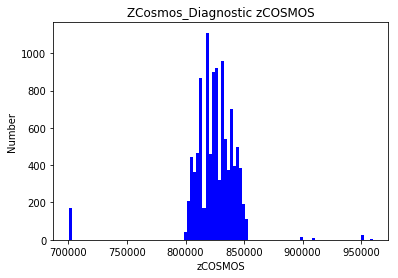

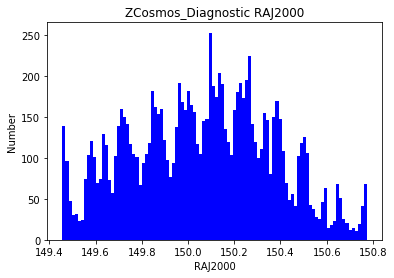

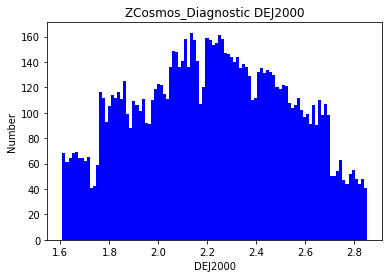

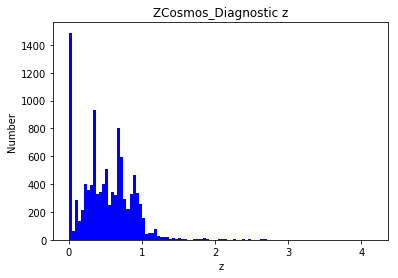

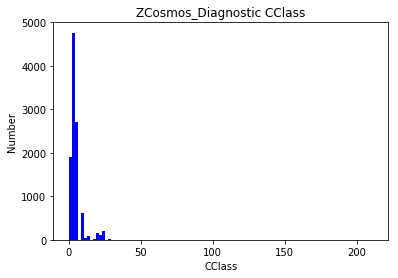

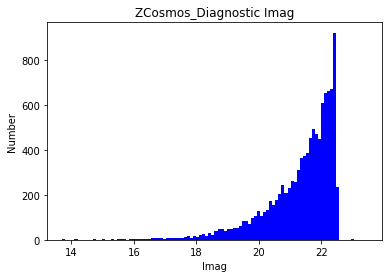

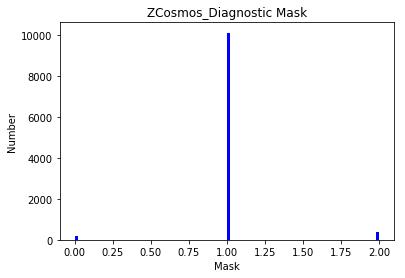

In [13]:
##diagnostic to find abnormal placeholder values for removal
for i in zcosmos_df:
    plt.hist(zcosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos_Diagnostic" + " " + i)
    plt.savefig("ZCosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [14]:
##remove abnormal placeholder values
zcosmos_df_part2 = zcosmos_df.query('z<999')
zcosmos_df_filtered = zcosmos_df_part2.query('z>0.000')
zcosmos_df_filtered.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


In [15]:
cosmos_df = pd.DataFrame(fits_data2[1].data)
cosmos_df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34


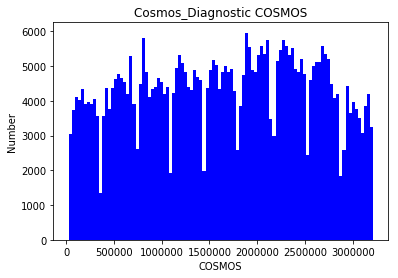

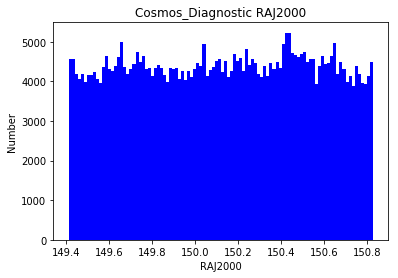

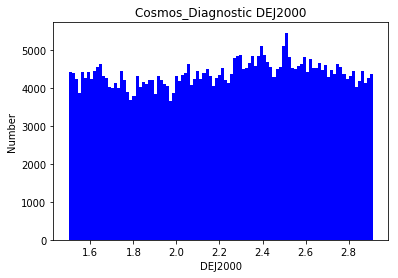

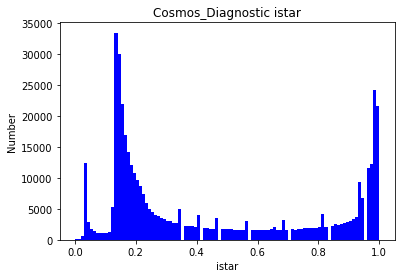

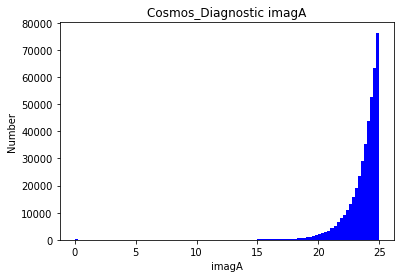

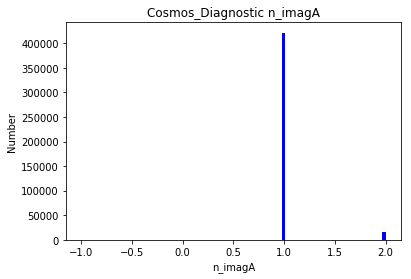

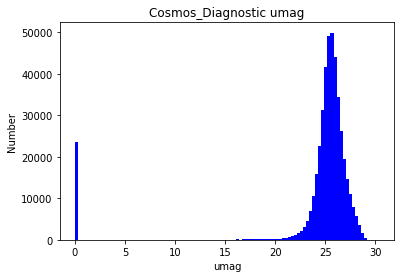

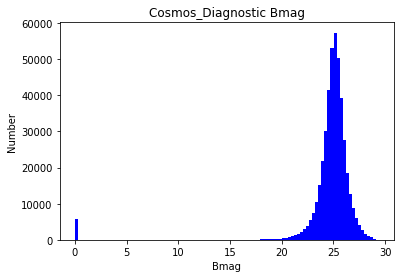

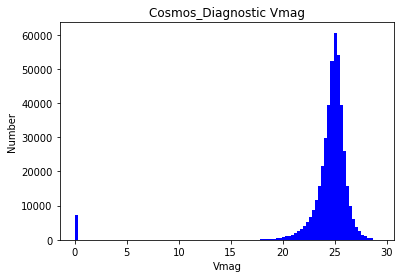

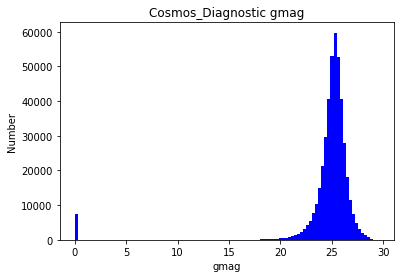

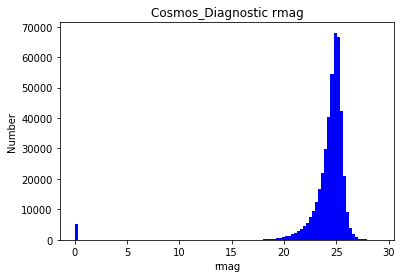

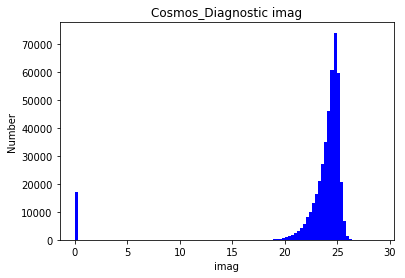

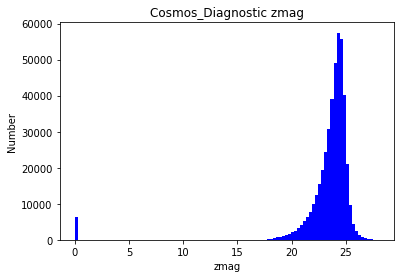

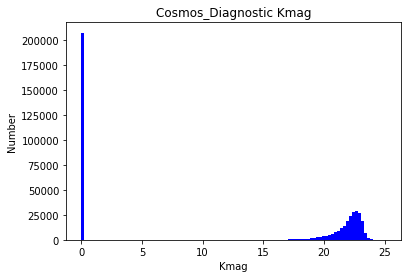

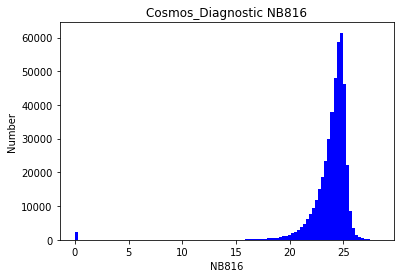

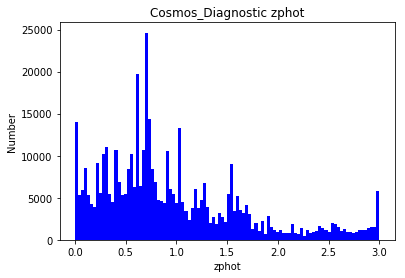

In [16]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_df:
    plt.hist(cosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_Diagnostic" + " " + i)
    plt.savefig("Cosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [17]:
#removal of abnormal placeholder values
cosmos_df_filtered = cosmos_df[(cosmos_df.umag > 0.00) 
                   & (cosmos_df.Bmag > 0.00) 
                   & (cosmos_df.Vmag > 0.00) 
                   & (cosmos_df.gmag > 0.00) 
                   & (cosmos_df.rmag > 0.00) 
                   & (cosmos_df.zmag > 0.00) 
                   & (cosmos_df.Vmag > 0.00) 
                   & (cosmos_df.gmag > 0.00) 
                   & (cosmos_df.rmag > 0.00) 
                   & (cosmos_df.imag > 0.00) 
                   & (cosmos_df.zmag > 0.00) 
                   & (cosmos_df.Kmag > 0.00) 
                   & (cosmos_df.zphot > 0.00)]
cosmos_df_filtered.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34
7,26445,150.77067,1.62592,0.23,24.5545,1,26.2447,26.3301,25.8424,26.3944,25.4246,24.7988,23.9830,22.2992,24.3973,1.20


In [18]:
##cross match of cosmos and zcosmos from http://cdsxmatch.u-strasbg.fr/xmatch
cosmos_and_zcosmos_cross_match3 = pd.read_csv('cross_match.csv')

In [19]:
print(cosmos_and_zcosmos_cross_match3.columns)

Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')


In [20]:
cosmos_and_zcosmos_cross_match_useful_columns = ['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000', 
                                                  'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
                                                  'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask']

In [21]:
print(cosmos_and_zcosmos_cross_match_useful_columns[14])

_RAJ2000.1


In [22]:
prob_col = cosmos_and_zcosmos_cross_match3.columns.tolist()[6]
np.all(np.isfinite(cosmos_and_zcosmos_cross_match3[prob_col]))

False

In [23]:
np.any(np.isinf(cosmos_and_zcosmos_cross_match3['Bmag']))


False

In [24]:
cosmos_and_zcosmos_cross_match2 = cosmos_and_zcosmos_cross_match3[np.logical_not(np.isnan(cosmos_and_zcosmos_cross_match3))]
cosmos_and_zcosmos_cross_match1 = cosmos_and_zcosmos_cross_match2[np.logical_not(np.isinf(cosmos_and_zcosmos_cross_match2))]

In [ ]:
def cleaner(a_dataframe, column_name, conditions):
    """
    removes rows with bad values
    
    parameters
    ----------
    a_dataframe: pandas dataframe
        the not-cleaned dataframe
    column_name: string
        the name of the column on which to filter by conditions
    conditions: list of functions (maybe?)
        conditions to check
    
    returns
    -------
    a_dataframe: pandas dataframe
        the cleaned dataframe
    
    notes
    -----
    
    """
    pass

In [27]:
#removal of abnormal placeholder values
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match1[(cosmos_and_zcosmos_cross_match1.Bmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.Imag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.imagA > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.z > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.zphot > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.zmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.Vmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.gmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.rmag > 0.00)
                                & (cosmos_and_zcosmos_cross_match1.istar > 0.00)]

angDist


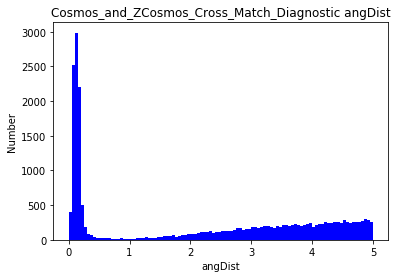

_RAJ2000


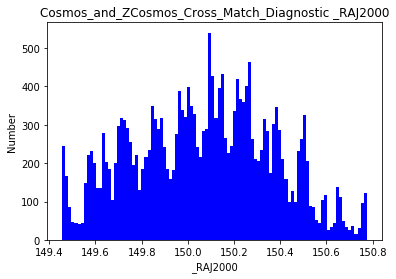

_DEJ2000


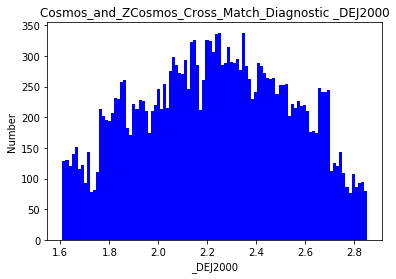

COSMOS


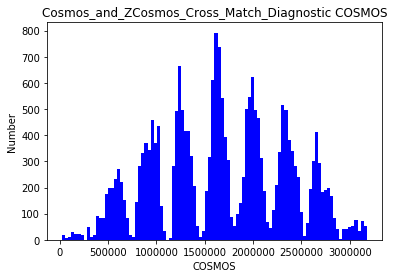

RAJ2000


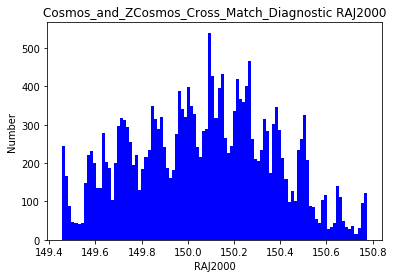

DEJ2000


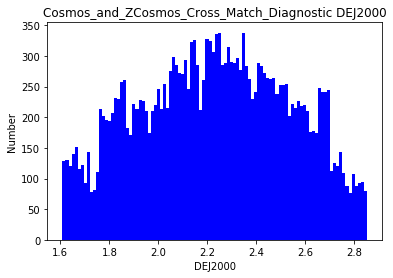

imagA


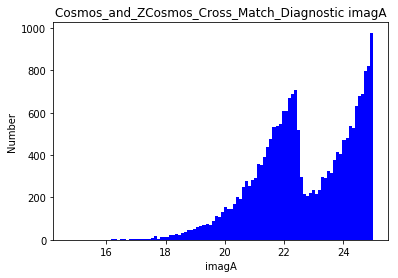

n_imagA


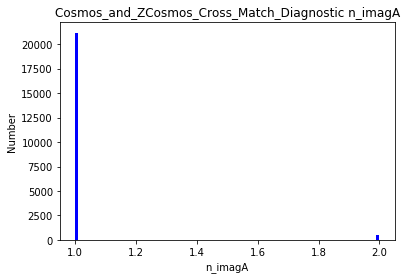

Bmag


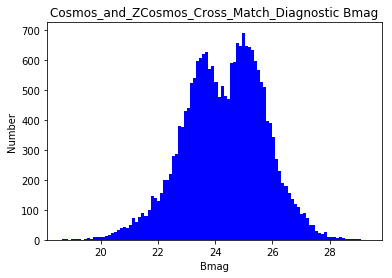

Vmag


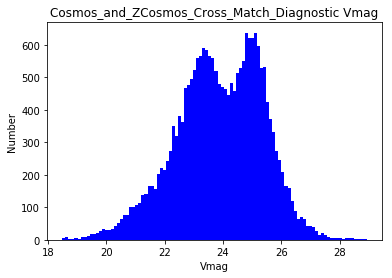

gmag


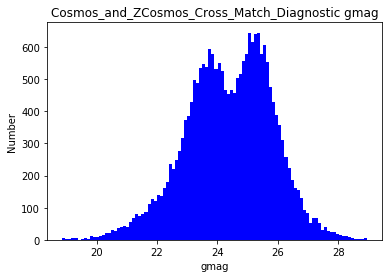

rmag


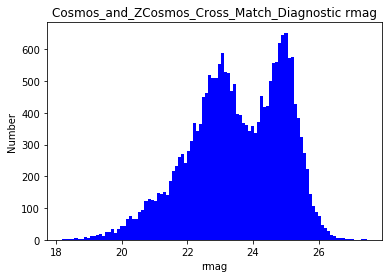

zmag


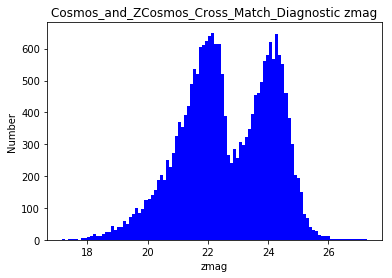

zphot


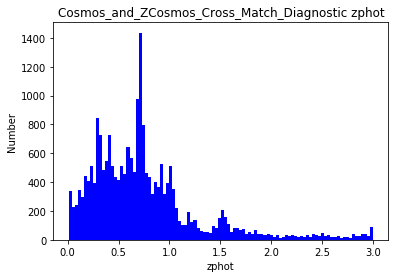

_RAJ2000.1


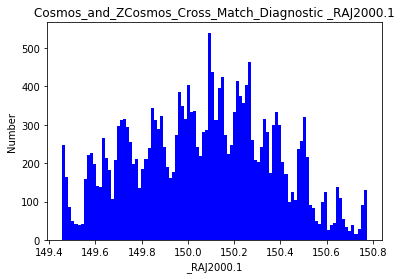

_DEJ2000.1


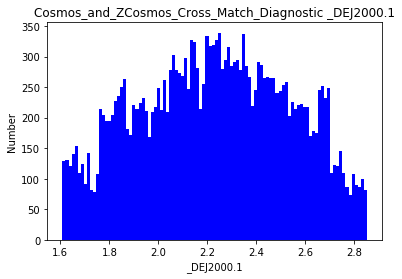

zCOSMOS


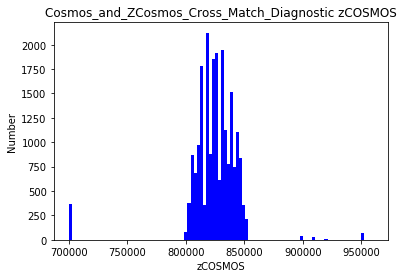

RAJ2000.1


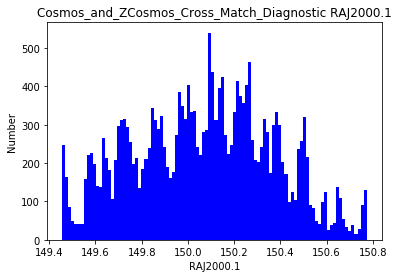

DEJ2000.1


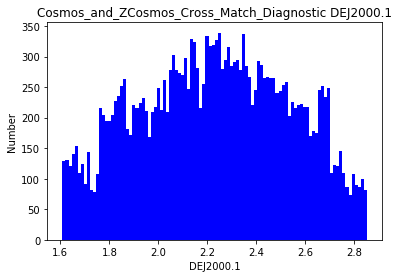

z


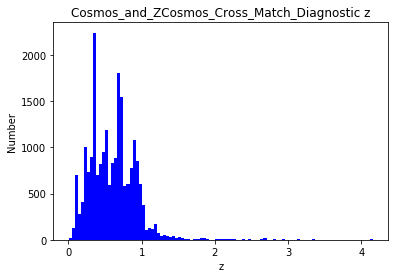

CClass


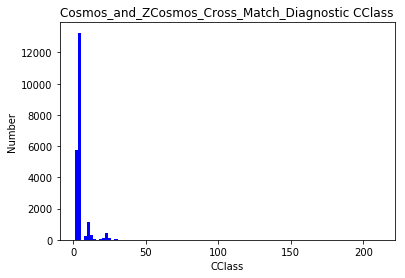

Imag


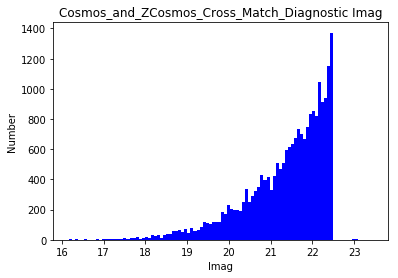

Mask


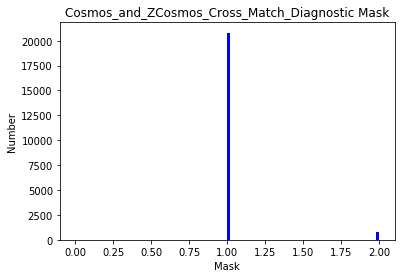

In [28]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_and_zcosmos_cross_match_useful_columns:
    print(i)
    plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i)
    plt.savefig("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [ ]:
##Find duplicates in cosmos_and_zcosmos_cross_match
total = 0
for i in cosmos_and_zcosmos_cross_match1:
    for line in cosmos_and_zcosmos_cross_match1:
        finded = line.find(i)
        if finded != -1 and finded != 0:
            total += 1
            if total > 1: 
                print(i)
##The only duplicates it shows me are ones I knew would be there (columns), so it seems there is nothing more for me to do about this. 

In [ ]:
##here is the document I actually need
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match[cosmos_and_zcosmos_cross_match_useful_columns]

In [ ]:
##Get only the points in cosmos that arent also in zcosmos.
cosmos_only = cosmos_df_filtered[~cosmos_df_filtered['COSMOS'].isin(cosmos_and_zcosmos_cross_match['COSMOS'])]
print(len(cosmos_only))

In [ ]:
##Get only the points in zcosmos that arent also in cosmos.
zcosmos_only = zcosmos_df_filtered[~zcosmos_df_filtered['zCOSMOS'].isin(cosmos_and_zcosmos_cross_match['zCOSMOS'])]
print(len(zcosmos_only))

In [ ]:
cosmos_only.columns

In [ ]:
##Comparing the magnitudes/redshifts of galaxies in both cosmos and zcosmos and galaxies just in cosmos
for i in cosmos_only.columns:
    if i in cosmos_and_zcosmos_cross_match.columns:
        print(i)
        plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, alpha=.2, normed = True)
        plt.hist(cosmos_only[i], color='green', linewidth=5, alpha=.2, normed = True)
        plt.xlabel(i)
        plt.ylabel("Number")
        plt.title("Galaxies In Comos Only" + " " + "Versus" + " " + "Galaxies In Cosmos AND Zcosmos" + " " + i)
        plt.savefig("Galaxies In Comos Only" + " " + "Versus" + "Galaxies In Cosmos AND Zcosmos" + " " + i + " " + "Plot.png")
        plt.show()

For imagA: 
- roughly equal percentage of galaxies iwth imag 15-18
- 